In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import datetime as dt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Importing Dataset

In [3]:
data = pd.read_csv("flight.csv")

In [4]:
data.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [5]:
# showing amount of row in dataset

data.shape[0]

62988

## EDA

### Feature category

In [6]:
category  = ['FFP_DATE','FIRST_FLIGHT_DATE','GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY','LOAD_TIME','LAST_FLIGHT_DATE']
numerical = ['MEMBER_NO','FFP_TIER','AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END',
             'AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','avg_discount','Points_Sum','Point_NotFlight']

In [7]:
data.shape[1] == data[category].shape[1] + data[numerical].shape[1]

True

In [8]:
data[category].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FFP_DATE           62988 non-null  object
 1   FIRST_FLIGHT_DATE  62988 non-null  object
 2   GENDER             62985 non-null  object
 3   WORK_CITY          60719 non-null  object
 4   WORK_PROVINCE      59740 non-null  object
 5   WORK_COUNTRY       62962 non-null  object
 6   LOAD_TIME          62988 non-null  object
 7   LAST_FLIGHT_DATE   62988 non-null  object
dtypes: object(8)
memory usage: 3.8+ MB


In [9]:
data[numerical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MEMBER_NO        62988 non-null  int64  
 1   FFP_TIER         62988 non-null  int64  
 2   AGE              62568 non-null  float64
 3   FLIGHT_COUNT     62988 non-null  int64  
 4   BP_SUM           62988 non-null  int64  
 5   SUM_YR_1         62437 non-null  float64
 6   SUM_YR_2         62850 non-null  float64
 7   SEG_KM_SUM       62988 non-null  int64  
 8   LAST_TO_END      62988 non-null  int64  
 9   AVG_INTERVAL     62988 non-null  float64
 10  MAX_INTERVAL     62988 non-null  int64  
 11  EXCHANGE_COUNT   62988 non-null  int64  
 12  avg_discount     62988 non-null  float64
 13  Points_Sum       62988 non-null  int64  
 14  Point_NotFlight  62988 non-null  int64  
dtypes: float64(5), int64(10)
memory usage: 7.2 MB


### Missing Values Identification

In [10]:
data[numerical].isna().sum().sort_values(ascending=False).head(5)

SUM_YR_1     551
AGE          420
SUM_YR_2     138
MEMBER_NO      0
FFP_TIER       0
dtype: int64

In [11]:
data[category].isna().sum().sort_values(ascending=False).head(5)

WORK_PROVINCE    3248
WORK_CITY        2269
WORK_COUNTRY       26
GENDER              3
FFP_DATE            0
dtype: int64

### Duplicated Values Identifaction

In [12]:
data.duplicated().sum()

0

### Weird Values Column Identification

In [13]:
data[numerical].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [14]:
data[category].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


### Outlier Values Identification

In [15]:
numerical_analysis = ['AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END',
             'AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','avg_discount','Points_Sum','Point_NotFlight']

In [16]:
data[numerical_analysis].head()

,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,31.0,210,505308,239560.0,234188.0,580717,1,3.483254,18,34,0.961639,619760,50
1,42.0,140,362480,171483.0,167434.0,293678,7,5.194245,17,29,1.252314,415768,33
2,40.0,135,351159,163618.0,164982.0,283712,11,5.298507,18,20,1.254676,406361,26
3,64.0,23,337314,116350.0,125500.0,281336,97,27.863636,73,11,1.090870,372204,12
4,48.0,152,273844,124560.0,130702.0,309928,5,4.788079,47,27,0.970658,338813,39


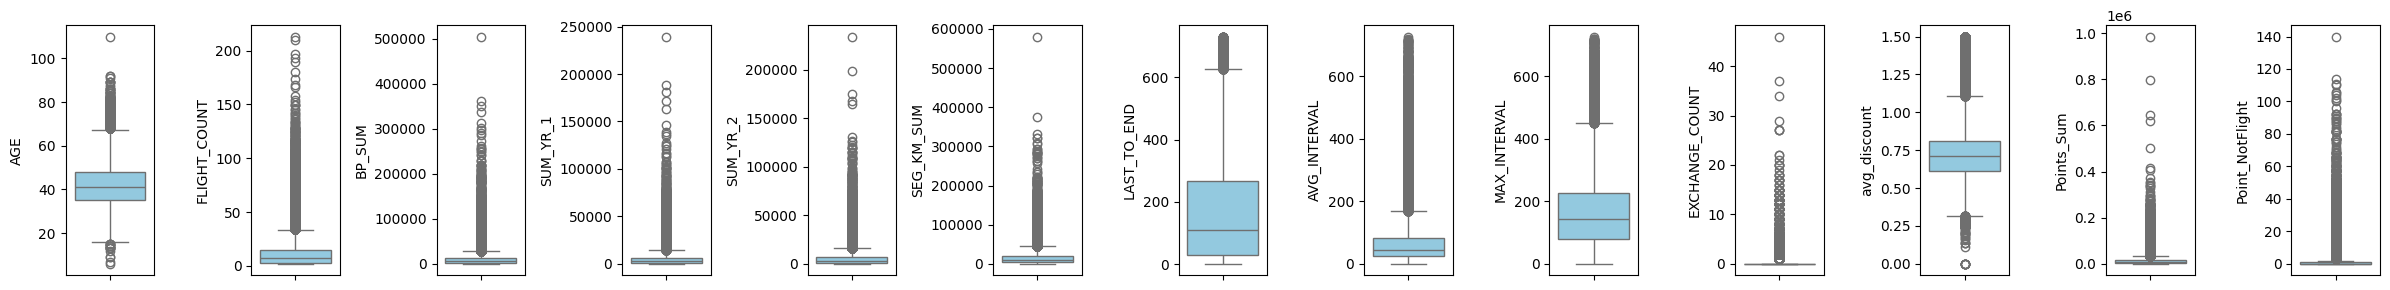

In [17]:
feature = numerical_analysis

plt.figure(figsize=(24,3))
for i in range(0,len(feature)):
    plt.subplot(1, len(feature), i+1)
    sns.boxplot(y=data[feature[i]], color='skyblue', orient='v')
    plt.tight_layout()

### Univariate Analysis

#### numerical

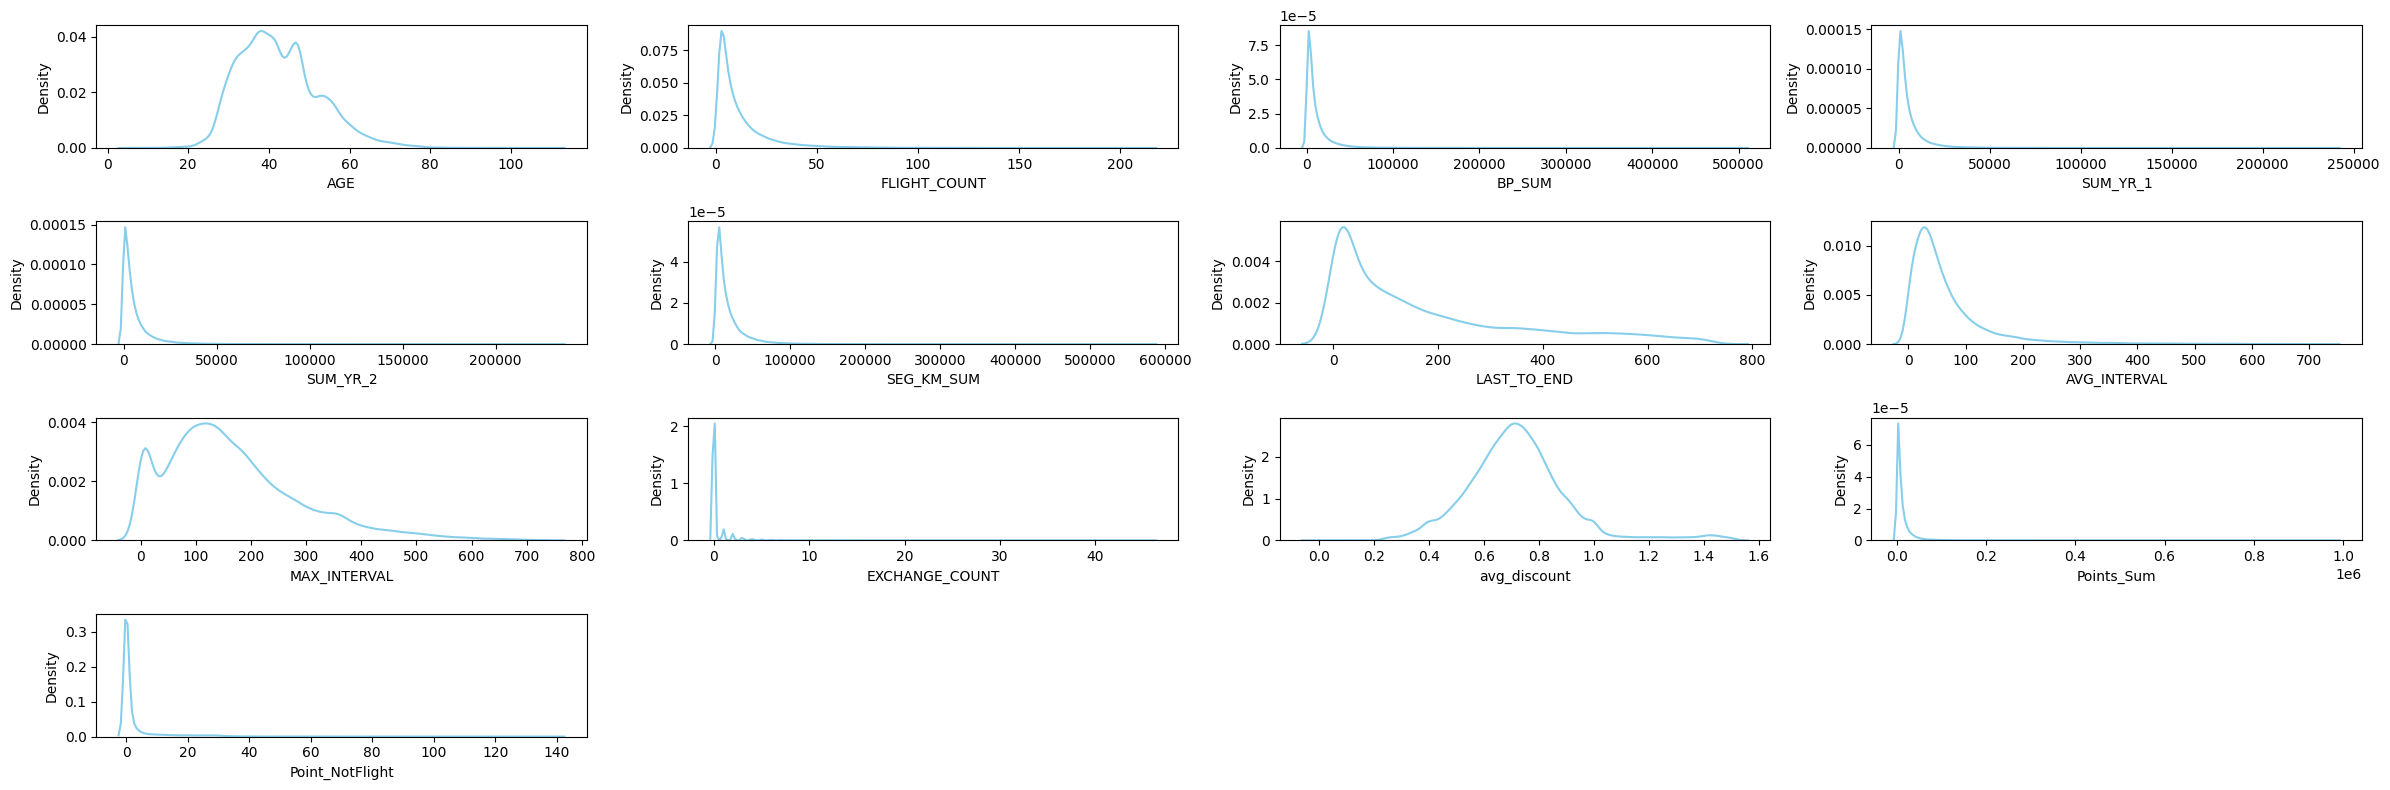

In [18]:
feature = numerical_analysis

plt.figure(figsize=(24,8))
for i in range(0, len(feature)):
    plt.subplot(4,4, i+1)
    sns.kdeplot(x=data[feature[i]], color='skyblue')
    plt.xlabel(feature[i])
    plt.tight_layout()

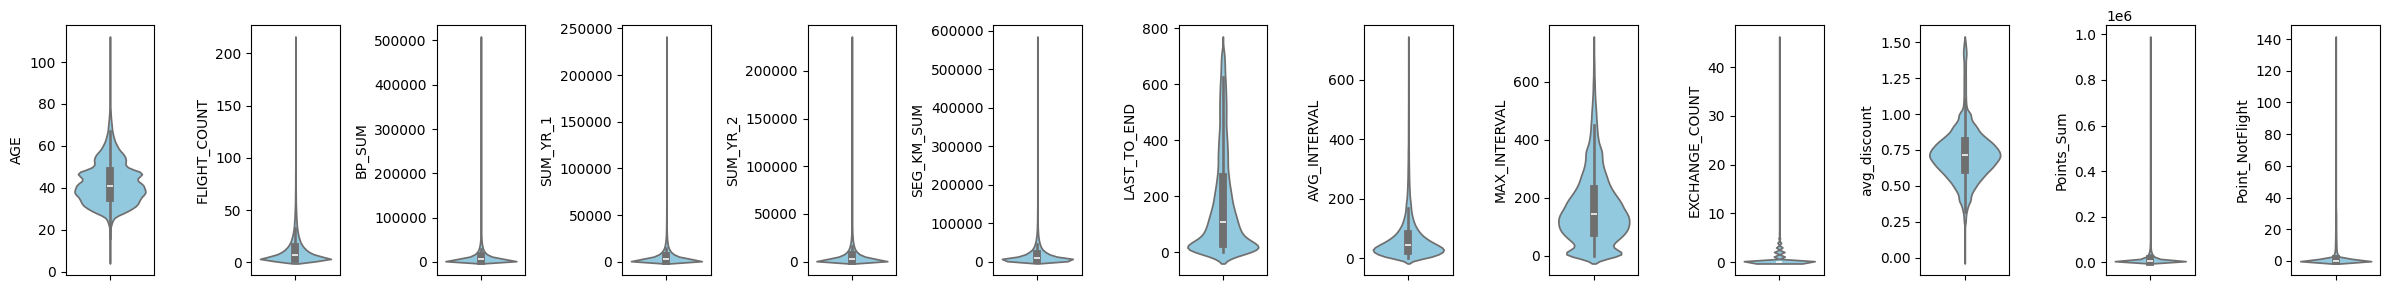

In [19]:
feature = numerical_analysis

plt.figure(figsize=(24,3))
for i in range(0,len(feature)):
    plt.subplot(1, len(feature), i+1)
    sns.violinplot(y=data[feature[i]], color='skyblue', orient='v')
    plt.tight_layout()

#### categorical

In [20]:
category

['FFP_DATE',
 'FIRST_FLIGHT_DATE',
 'GENDER',
 'WORK_CITY',
 'WORK_PROVINCE',
 'WORK_COUNTRY',
 'LOAD_TIME',
 'LAST_FLIGHT_DATE']

In [21]:
cat_date = ['FFP_DATE','FIRST_FLIGHT_DATE','LOAD_TIME','LAST_FLIGHT_DATE']
cat_work = ['WORK_CITY','WORK_PROVINCE','WORK_COUNTRY']
cat_usual = ['GENDER']

data[category].shape[1] == data[cat_date].shape[1] + data[cat_work].shape[1] + data[cat_usual].shape[1]

True

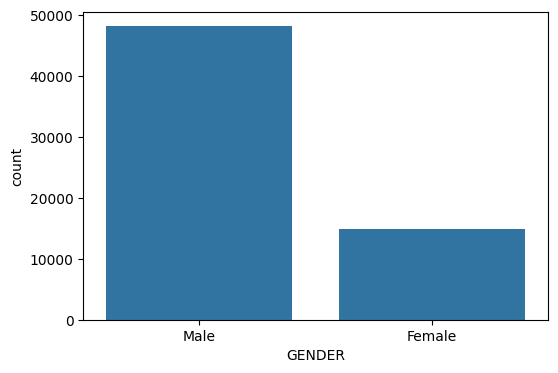

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(data[cat_usual], x='GENDER')
plt.show()

### Multivariate Analysis

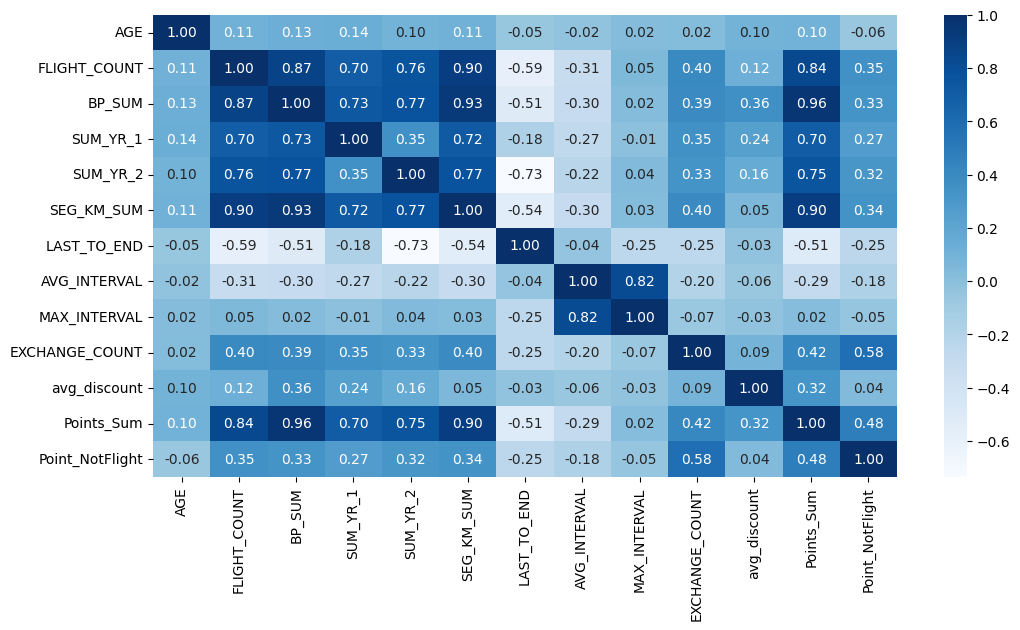

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(data[numerical_analysis].corr(method='spearman'), cmap='Blues', annot=True, fmt='.2f')
plt.show()

## Pre-Processing

In [24]:
data_used = data

In [25]:
data_used.columns

Index(['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER',
       'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'LOAD_TIME',
       'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM',
       'LAST_FLIGHT_DATE', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')

### Data Cleansing

#### Missing Values

In [26]:
data_used.drop(['MEMBER_NO'], axis=1, inplace=True)

In [27]:
data_used.columns

Index(['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER', 'WORK_CITY',
       'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'LOAD_TIME', 'FLIGHT_COUNT',
       'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_FLIGHT_DATE',
       'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT',
       'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')

##### Categorical

In [28]:
data_used[category].isna().sum().sort_values(ascending=False).head(5)

WORK_PROVINCE    3248
WORK_CITY        2269
WORK_COUNTRY       26
GENDER              3
FFP_DATE            0
dtype: int64

In [29]:
data_used['WORK_PROVINCE'].fillna(data_used['WORK_PROVINCE'].mode()[0], inplace=True)
data_used['WORK_CITY'].fillna(data_used['WORK_CITY'].mode()[0], inplace=True)

In [30]:
data_used.dropna(subset=['GENDER','WORK_COUNTRY'],inplace=True)

In [31]:
data_used[category].isna().sum().sort_values(ascending=False).head(5)

FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
WORK_CITY            0
WORK_PROVINCE        0
dtype: int64

##### Numerical

In [32]:
data_used[numerical_analysis].isna().sum().sort_values(ascending=False).head(5)

SUM_YR_1        551
AGE             419
SUM_YR_2        138
FLIGHT_COUNT      0
BP_SUM            0
dtype: int64

In [33]:
data_used.dropna(subset=['SUM_YR_1','AGE','SUM_YR_2'],inplace=True)

In [34]:
data_used[numerical_analysis].isna().sum().sort_values(ascending=False).head(5)

AGE             0
FLIGHT_COUNT    0
BP_SUM          0
SUM_YR_1        0
SUM_YR_2        0
dtype: int64

In [35]:
data_used.shape[0]

61856

In [36]:
data_used.isna().sum()

FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

#### Duplicated Handling

In [37]:
data_used.duplicated().sum()

1

In [38]:
data_used.drop_duplicates(keep='first', inplace=True)

In [39]:
data_used.duplicated().sum()

0

#### Outlier Handling

In [40]:
data_used[numerical_analysis].head()

,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,31.0,210,505308,239560.0,234188.0,580717,1,3.483254,18,34,0.961639,619760,50
1,42.0,140,362480,171483.0,167434.0,293678,7,5.194245,17,29,1.252314,415768,33
2,40.0,135,351159,163618.0,164982.0,283712,11,5.298507,18,20,1.254676,406361,26
3,64.0,23,337314,116350.0,125500.0,281336,97,27.863636,73,11,1.090870,372204,12
4,48.0,152,273844,124560.0,130702.0,309928,5,4.788079,47,27,0.970658,338813,39


In [41]:
numerical_analysis

['AGE',
 'FLIGHT_COUNT',
 'BP_SUM',
 'SUM_YR_1',
 'SUM_YR_2',
 'SEG_KM_SUM',
 'LAST_TO_END',
 'AVG_INTERVAL',
 'MAX_INTERVAL',
 'EXCHANGE_COUNT',
 'avg_discount',
 'Points_Sum',
 'Point_NotFlight']

##### Using IQR

In [42]:
data_used[numerical_analysis].describe()

,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,61855.000000,61855.000000,61855.000000,61855.000000,61855.000000,61855.000000,61855.000000,61855.000000,61855.000000,61855.000000,61855.000000,61855.000000,61855.000000
mean,42.491149,11.964562,11041.633482,5374.989642,5662.172937,17304.011462,172.600162,68.155923,167.464150,0.324194,0.721651,12681.856212,2.759470
std,9.887630,14.116122,16394.566697,8124.009475,8702.772421,21040.381611,181.227990,77.684340,123.154321,1.143996,0.184793,20597.613331,7.406292
min,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,3.000000,2591.000000,1020.000000,833.000000,4867.000000,29.000000,23.750000,81.000000,0.000000,0.612660,2848.000000,0.000000
50%,41.000000,7.000000,5801.000000,2816.000000,2827.000000,10183.000000,105.000000,45.000000,144.000000,0.000000,0.711828,6442.000000,0.000000
75%,48.000000,15.000000,12975.500000,6600.000000,6912.000000,21498.000000,260.000000,82.500000,229.000000,0.000000,0.808828,14457.500000,1.000000
max,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000


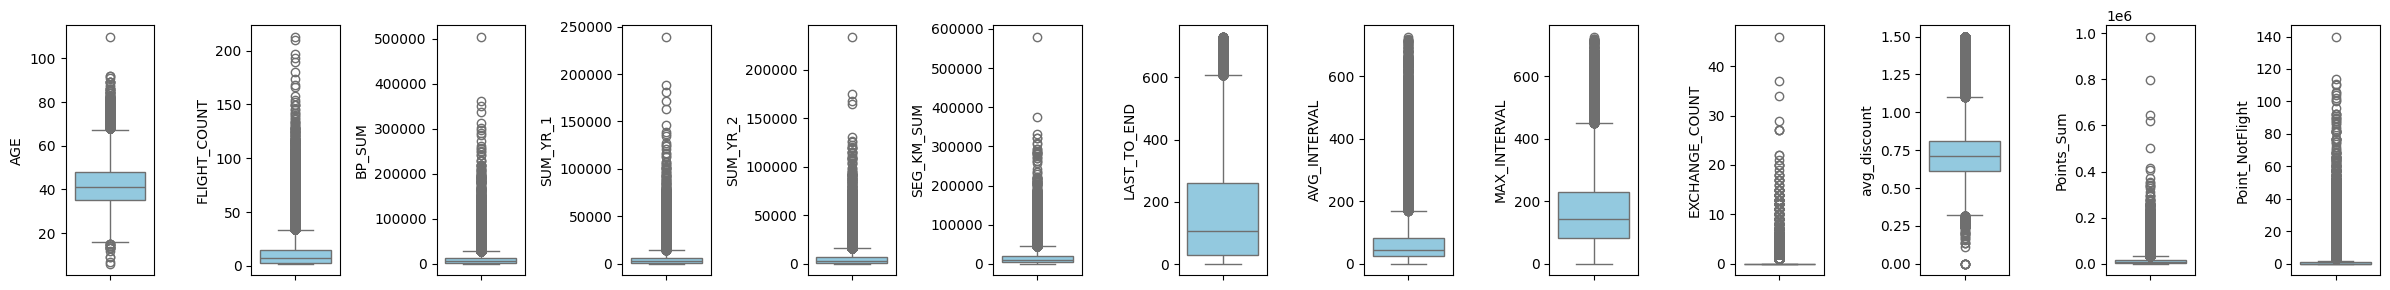

In [43]:
feature = numerical_analysis

plt.figure(figsize=(24,3))
for i in range(0,len(feature)):
    plt.subplot(1, len(feature), i+1)
    sns.boxplot(y=data_used[feature[i]], color='skyblue', orient='v')
    plt.tight_layout()

In [44]:
def iqr_treshold(variable):
    Q1 = data_used[variable].quantile(.25)
    Q3 = data_used[variable].quantile(.75)

    IQR = Q3-Q1

    min_tresh = Q1 - (1.5*IQR)
    max_tresh = Q1 + (1.5*IQR)
    
    return min_tresh, max_tresh

In [45]:
def iqr_normalize(variable):
    normal = ((data_used[variable] >= iqr_treshold(variable)[0]) & 
                (data_used[variable] <= iqr_treshold(variable)[1]))
    data_used['outlier_label'] = normal

In [46]:
iqr_normalize('AGE')
data_used = data_used.drop(data_used.query("outlier_label == False").index)

iqr_normalize('FLIGHT_COUNT')
data_used = data_used.drop(data_used.query("outlier_label == False").index)

iqr_normalize('BP_SUM')
data_used = data_used.drop(data_used.query("outlier_label == False").index)

iqr_normalize('SUM_YR_1')
data_used = data_used.drop(data_used.query("outlier_label == False").index)

iqr_normalize('SUM_YR_2')
data_used = data_used.drop(data_used.query("outlier_label == False").index)

iqr_normalize('SEG_KM_SUM')
data_used = data_used.drop(data_used.query("outlier_label == False").index)

iqr_normalize('LAST_TO_END')
data_used = data_used.drop(data_used.query("outlier_label == False").index)

iqr_normalize('AVG_INTERVAL')
data_used = data_used.drop(data_used.query("outlier_label == False").index)

iqr_normalize('MAX_INTERVAL')
data_used = data_used.drop(data_used.query("outlier_label == False").index)

iqr_normalize('EXCHANGE_COUNT')
data_used = data_used.drop(data_used.query("outlier_label == False").index)

iqr_normalize('avg_discount')
data_used = data_used.drop(data_used.query("outlier_label == False").index)

iqr_normalize('Points_Sum')
data_used = data_used.drop(data_used.query("outlier_label == False").index)

iqr_normalize('Point_NotFlight')
data_used = data_used.drop(data_used.query("outlier_label == False").index)

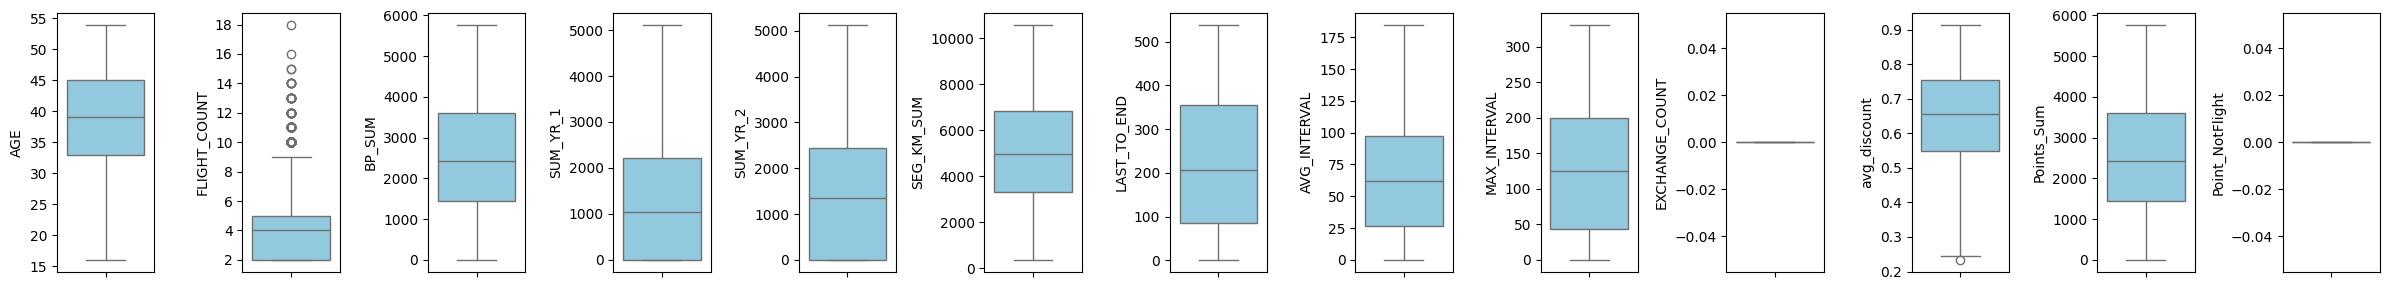

In [47]:
feature = numerical_analysis

plt.figure(figsize=(24,3))
for i in range(0,len(feature)):
    plt.subplot(1, len(feature), i+1)
    sns.boxplot(y=data_used[feature[i]], color='skyblue', orient='v')
    plt.tight_layout()

In [48]:
data_used.drop(['outlier_label'], axis=1, inplace=True)

In [49]:
data_used[numerical_analysis].describe()

,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.0,11610.000000,11610.000000,11610.0
mean,39.063221,4.078208,2566.306804,1317.805254,1532.404220,5160.947201,226.934711,65.637916,128.756503,0.0,0.647331,2566.406029,0.0
std,7.491527,2.053278,1412.842248,1336.253542,1339.447598,2341.429776,157.324377,46.697215,93.355242,0.0,0.146505,1412.842676,0.0
min,16.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.0,0.233824,0.000000,0.0
25%,33.000000,2.000000,1452.000000,0.000000,0.000000,3308.000000,86.000000,26.678571,44.000000,0.0,0.549954,1452.000000,0.0
50%,39.000000,4.000000,2427.500000,1048.000000,1353.000000,4950.000000,207.000000,62.154762,125.000000,0.0,0.657376,2427.500000,0.0
75%,45.000000,5.000000,3595.500000,2220.000000,2450.750000,6855.750000,356.000000,97.000000,199.000000,0.0,0.755863,3595.500000,0.0
max,54.000000,18.000000,5778.000000,5120.000000,5136.000000,10599.000000,539.000000,185.000000,331.000000,0.0,0.915712,5778.000000,0.0


#### Feature Extraction

In [50]:
data_used[category].columns

Index(['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE',
       'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE'],
      dtype='object')

In [51]:
# extract only year

data_used[cat_date].columns

Index(['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE'], dtype='object')

In [52]:
data_used['FFP_YEAR'] = pd.to_datetime(data_used['FFP_DATE'])

In [53]:
data_used['FIRST_FLIGHT_YEAR'] = pd.to_datetime(data_used['FIRST_FLIGHT_DATE'])

In [54]:
data_used['LAST_FLIGHT_YEAR'] = pd.to_datetime(data_used['LAST_FLIGHT_DATE'], format='mixed', errors='coerce')

In [55]:
data_used.drop(['LOAD_TIME'], axis=1, inplace=True)

In [56]:
data_used[['FFP_YEAR', 'FIRST_FLIGHT_YEAR', 'LAST_FLIGHT_YEAR']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 11610 entries, 28142 to 62978
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_YEAR           11610 non-null  datetime64[ns]
 1   FIRST_FLIGHT_YEAR  11610 non-null  datetime64[ns]
 2   LAST_FLIGHT_YEAR   11557 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 362.8 KB


In [57]:
data_used['FFP_YEAR'] = data_used.FFP_YEAR.dt.year

In [58]:
data_used['FIRST_FLIGHT_YEAR'] = data_used.FIRST_FLIGHT_YEAR.dt.year
data_used['LAST_FLIGHT_YEAR'] = data_used.LAST_FLIGHT_YEAR.dt.year

In [59]:
data_used.drop(['FFP_DATE','FIRST_FLIGHT_DATE','LAST_FLIGHT_DATE'], axis=1, inplace=True)

In [60]:
data_used.columns

Index(['GENDER', 'FFP_TIER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY',
       'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM',
       'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT',
       'avg_discount', 'Points_Sum', 'Point_NotFlight', 'FFP_YEAR',
       'FIRST_FLIGHT_YEAR', 'LAST_FLIGHT_YEAR'],
      dtype='object')

In [61]:
data_used[cat_work].columns

Index(['WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY'], dtype='object')

In [62]:
other_city = data_used.WORK_CITY.value_counts().to_frame().reset_index().query("count <= 321").WORK_CITY.to_list()
data_used.loc[:,['WORK_CITY']] = data_used.replace(other_city,"others")

In [63]:
data_used.WORK_CITY.value_counts()

WORK_CITY
others       6386
guangzhou    1662
beijing      1550
shanghai     1190
shenzhen      822
Name: count, dtype: int64

In [64]:
other_province = data_used.WORK_PROVINCE.value_counts().to_frame().reset_index().query("count <= 374").WORK_PROVINCE.to_list()
data_used.loc[:,['WORK_PROVINCE']] = data_used.replace(other_province,"others")

In [65]:
data_used.WORK_PROVINCE.value_counts()

WORK_PROVINCE
others       4998
guangdong    3334
beijing      1435
shanghai     1160
liaoning      683
Name: count, dtype: int64

In [66]:
other_country = data_used.WORK_COUNTRY.value_counts().to_frame().reset_index().query("count <= 10").WORK_COUNTRY.to_list()
data_used.loc[:,['WORK_COUNTRY']] = data_used.replace(other_country,"others")

### Feature Engineering

#### Feature Selection

In [67]:
len(data_used.columns)

21

In [68]:
data_used.columns

Index(['GENDER', 'FFP_TIER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY',
       'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM',
       'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT',
       'avg_discount', 'Points_Sum', 'Point_NotFlight', 'FFP_YEAR',
       'FIRST_FLIGHT_YEAR', 'LAST_FLIGHT_YEAR'],
      dtype='object')

In [69]:
data_used.drop(['EXCHANGE_COUNT', 'Point_NotFlight'], axis=1, inplace=True)

In [70]:
data_used.columns

Index(['GENDER', 'FFP_TIER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY',
       'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM',
       'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'avg_discount',
       'Points_Sum', 'FFP_YEAR', 'FIRST_FLIGHT_YEAR', 'LAST_FLIGHT_YEAR'],
      dtype='object')

In [71]:
len(data_used.columns)

19

In [72]:
data_used.drop(['WORK_CITY', 'WORK_PROVINCE'], axis=1, inplace=True)

In [73]:
len(data_used.columns)

17

#### Feature Encoding

In [74]:
data_used.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11610 entries, 28142 to 62978
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GENDER             11610 non-null  object 
 1   FFP_TIER           11610 non-null  int64  
 2   WORK_COUNTRY       11610 non-null  object 
 3   AGE                11610 non-null  float64
 4   FLIGHT_COUNT       11610 non-null  int64  
 5   BP_SUM             11610 non-null  int64  
 6   SUM_YR_1           11610 non-null  float64
 7   SUM_YR_2           11610 non-null  float64
 8   SEG_KM_SUM         11610 non-null  int64  
 9   LAST_TO_END        11610 non-null  int64  
 10  AVG_INTERVAL       11610 non-null  float64
 11  MAX_INTERVAL       11610 non-null  int64  
 12  avg_discount       11610 non-null  float64
 13  Points_Sum         11610 non-null  int64  
 14  FFP_YEAR           11610 non-null  int32  
 15  FIRST_FLIGHT_YEAR  11610 non-null  int32  
 16  LAST_FLIGHT_YEAR   1155

In [75]:
category = ['GENDER','FFP_TIER','WORK_COUNTRY','FFP_YEAR','FIRST_FLIGHT_YEAR','LAST_FLIGHT_YEAR']
numerical = ['AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL',
             'avg_discount','Points_Sum']

##### label encoder

In [76]:
data_used['FFP_YEAR'].value_counts()

FFP_YEAR
2012    3010
2011    1831
2013    1542
2010    1235
2008    1164
2009     957
2007     903
2006     578
2005     362
2004      28
Name: count, dtype: int64

In [77]:
mapping_tier = {
    2004 : 0,
    2005 : 1,
    2006 : 2,
    2007 : 3,
    2008 : 4,
    2009 : 5,
    2010 : 6,
    2011 : 7,
    2012 : 8,
    2013 : 9
}

data_used['FFP_YEAR'] = data_used['FFP_YEAR'].map(mapping_tier)

In [78]:
data_used['FIRST_FLIGHT_YEAR'].value_counts()

FIRST_FLIGHT_YEAR
2013    2982
2012    2708
2011    1687
2010    1172
2008     802
2009     793
2007     588
2006     389
2014     260
2005     226
2004       3
Name: count, dtype: int64

In [79]:
mapping_FIRST_FLIGHT_YEAR = {
    2004 : 0,
    2005 : 1,
    2006 : 2,
    2007 : 3,
    2008 : 4,
    2009 : 5,
    2010 : 6,
    2011 : 7,
    2012 : 8,
    2013 : 9,
    2014 : 10
}

data_used['FIRST_FLIGHT_YEAR'] = data_used['FIRST_FLIGHT_YEAR'].map(mapping_FIRST_FLIGHT_YEAR)

In [80]:
data_used['LAST_FLIGHT_YEAR'].value_counts()

LAST_FLIGHT_YEAR
2013.0    7351
2014.0    2972
2012.0    1234
Name: count, dtype: int64

In [82]:
mapping_LAST_FLIGHT_YEAR = {
    2012.0 : 0,
    2013.0 : 1,
    2014.0 : 2
}

data_used['LAST_FLIGHT_YEAR'] = data_used['LAST_FLIGHT_YEAR'].map(mapping_LAST_FLIGHT_YEAR)

##### OHE

In [86]:
data_used['GENDER'].value_counts()

GENDER
Male      8458
Female    3152
Name: count, dtype: int64

In [88]:
data_used_ohe = pd.get_dummies(data_used['GENDER'],prefix='gender', dtype=int)
data_used = data_used.join(data_used_ohe)

In [87]:
data_used['WORK_COUNTRY'].value_counts()

WORK_COUNTRY
CN        10847
HK          178
KR          138
others      105
TW           72
JP           68
US           51
SG           45
PH           24
MY           23
AU           18
VN           15
TH           14
CA           12
Name: count, dtype: int64

In [89]:
work_country_ohe = pd.get_dummies(data_used['WORK_COUNTRY'],prefix='work_country', dtype=int)
data_used = data_used.join(work_country_ohe)

In [97]:
data_used.drop(['GENDER','WORK_COUNTRY'], axis=1, inplace=True)

In [95]:
data_used.dropna(inplace=True)

In [99]:
data_used.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11557 entries, 28142 to 62978
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FFP_TIER             11557 non-null  int64  
 1   AGE                  11557 non-null  float64
 2   FLIGHT_COUNT         11557 non-null  int64  
 3   BP_SUM               11557 non-null  int64  
 4   SUM_YR_1             11557 non-null  float64
 5   SUM_YR_2             11557 non-null  float64
 6   SEG_KM_SUM           11557 non-null  int64  
 7   LAST_TO_END          11557 non-null  int64  
 8   AVG_INTERVAL         11557 non-null  float64
 9   MAX_INTERVAL         11557 non-null  int64  
 10  avg_discount         11557 non-null  float64
 11  Points_Sum           11557 non-null  int64  
 12  FFP_YEAR             11557 non-null  int64  
 13  FIRST_FLIGHT_YEAR    11557 non-null  int64  
 14  LAST_FLIGHT_YEAR     11557 non-null  float64
 15  gender_Female        11557 non-null  

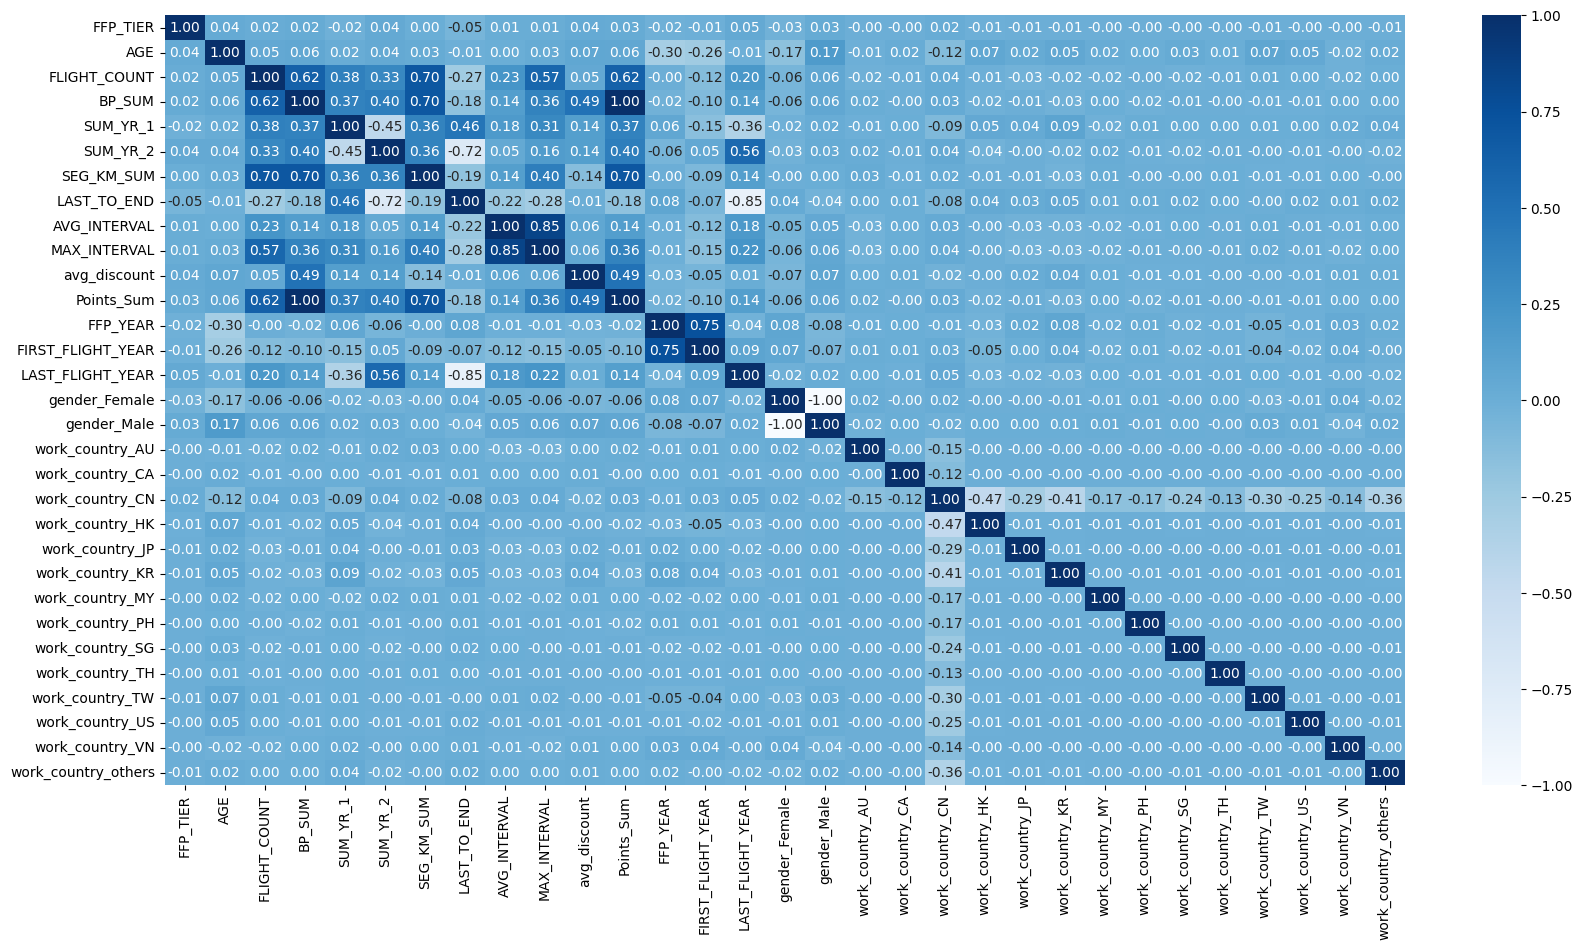

In [102]:
plt.figure(figsize=(20,10))
sns.heatmap(data_used.corr(method='spearman'), cmap='Blues', annot=True, fmt='.2f')
plt.show()

In [104]:
data_used.head()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,avg_discount,Points_Sum,FFP_YEAR,FIRST_FLIGHT_YEAR,LAST_FLIGHT_YEAR,gender_Female,gender_Male,work_country_AU,work_country_CA,work_country_CN,work_country_HK,work_country_JP,work_country_KR,work_country_MY,work_country_PH,work_country_SG,work_country_TH,work_country_TW,work_country_US,work_country_VN,work_country_others
28142,4,47.0,9,5631,2683.0,3806.0,10286,1,89.500000,218,0.793237,5631,8,8,2.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
28676,4,44.0,5,5724,3366.0,1489.0,10373,16,145.000000,262,0.767082,5724,8,8,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
29639,4,34.0,8,5241,4300.0,3126.0,10566,297,52.142857,233,0.720282,5241,5,5,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
29652,4,48.0,6,5474,2010.0,4339.0,9373,273,25.000000,74,0.811438,5474,7,7,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
29659,4,53.0,11,5205,3946.0,4503.0,10421,174,53.800000,135,0.729715,5205,1,1,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [106]:
data_used.drop(['BP_SUM','SEG_KM_SUM'], axis=1, inplace=True)

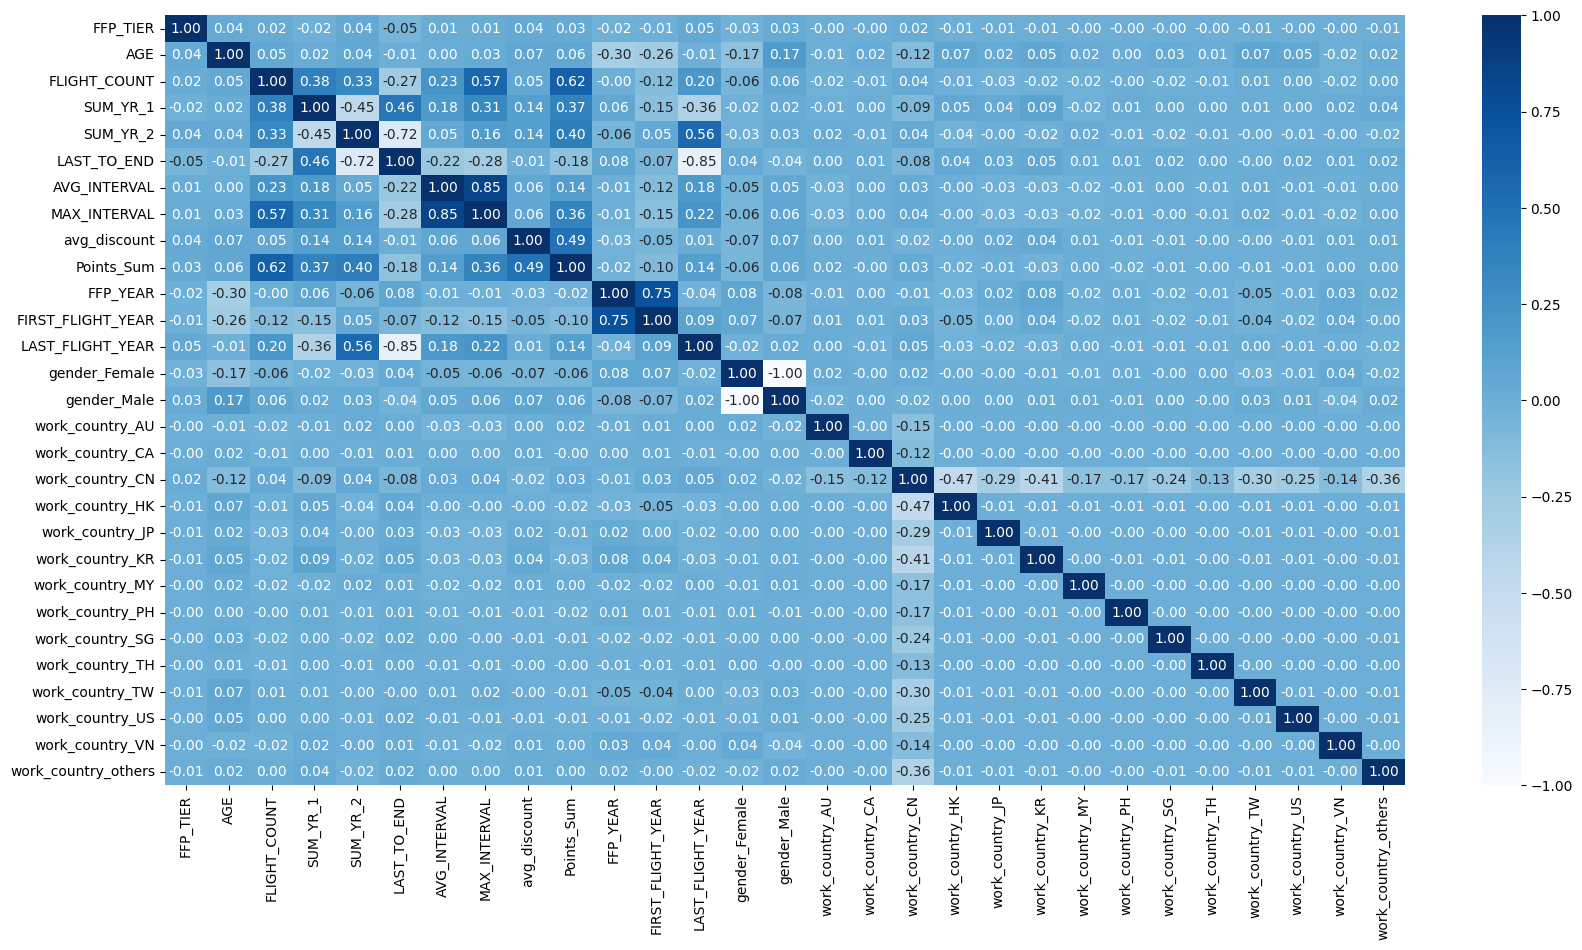

In [107]:
plt.figure(figsize=(20,10))
sns.heatmap(data_used.corr(method='spearman'), cmap='Blues', annot=True, fmt='.2f')
plt.show()

#### Feature Transformation

### Modeling